['1.png', '2.png', '3.png', '4.png']


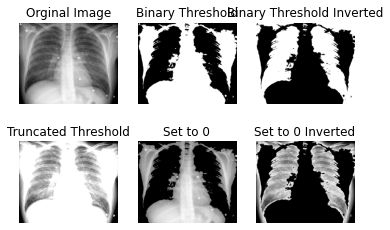

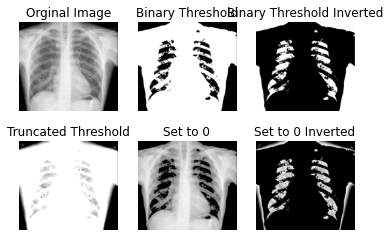

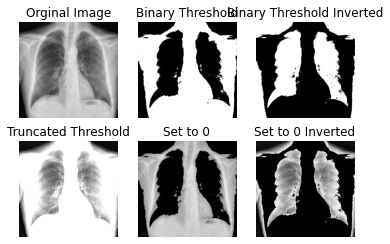

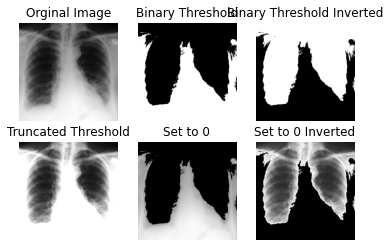

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import skimage.io as io

no=4

ft='.png'
name=[]
for i in range(no):
    n=str(i+1)
    name.append(n+ft)
print(name)

for j in range(no):
    image1 = io.imread(name[j])
    img = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
    
    ret, thresh1 = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
    ret, thresh2 = cv.threshold(img, 120, 255, cv.THRESH_BINARY_INV)
    ret, thresh3 = cv.threshold(img, 120, 255, cv.THRESH_TRUNC)
    ret, thresh4 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO)
    ret, thresh5 = cv.threshold(img, 120, 255, cv.THRESH_TOZERO_INV)

    t=["Orginal Image","Binary Threshold","Binary Threshold Inverted","Truncated Threshold","Set to 0","Set to 0 Inverted"]
    im=[img,thresh1,thresh2,thresh3,thresh4,thresh5]
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.title(t[i])
        plt.imshow(im[i],cmap="gray")
        plt.axis('off')
    plt.show()


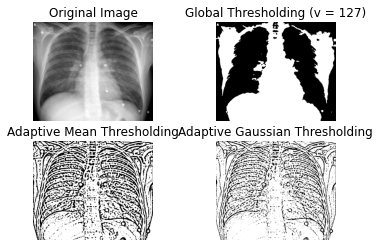

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('1.png',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

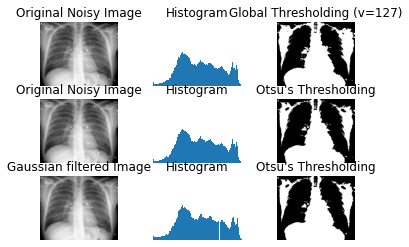

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('1.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.axis('off')
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.axis('off')
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.axis('off')
plt.show()
